### Bibliotecas

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Carregamento dos dados

Os dados se encontram neste [link](https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv)

Colunas

- **longitude** e **latitude**: coordendas geográficas da localização das casas;
- **housing_median_age**: idade média das casas;
- **total_rooms**: total de quartos das casas na região;
- **total_bedrooms**: total de quartos para dormir na região;
- **population**: número da população local;
- **households**: quantidade de famílias na região;
- **median_income**: renda média;
- **median_house_value**: preço média da casa;
- **ocean_proximity**: proximidade do oceano.

In [26]:
df = pd.read_csv("data/housing.csv", sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Explorando os dados

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Como é possível ver, temos 20640 instâncias no conjunto de dados, com exceção da coluna *total_bedrooms*, então devemos tratar esse problema. Além disso, somente *ocean_proximity* é uma variável categórica.

In [28]:
# Categorias
categorias_ocean = df.ocean_proximity.unique()
categorias_ocean

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [29]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Há um grande desequilíbrio nos dados, vamos tratar isso logo a seguir.

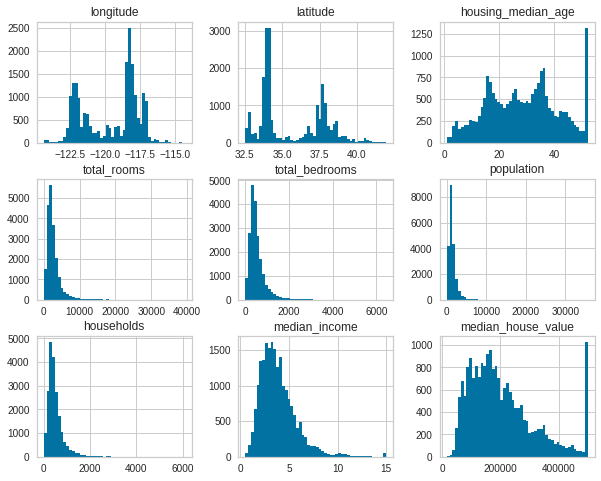

In [30]:
df.hist(bins=50, figsize=(10, 8))
plt.show()

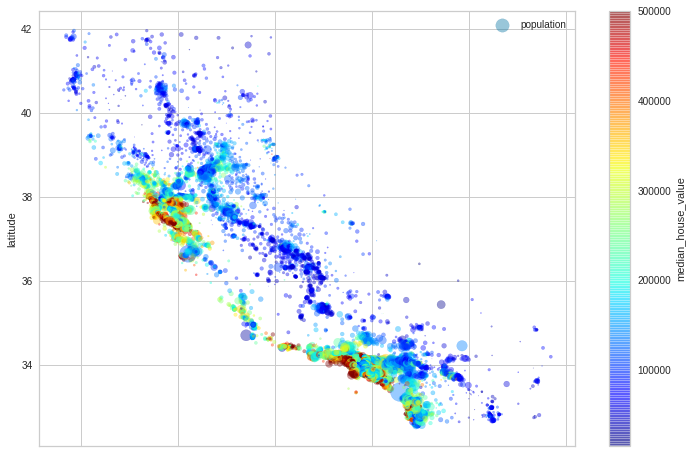

In [31]:
# Visualizando os dados em termos de longitude e latitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=df['population']/100, label='population',
figsize=(12, 8), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

Como é possível notar, o gráfico mostra os preços das casas na Califórnia, onde o vermelho é caro, o azul é barato, os círculos maiores indicam áreas com uma população maior.

<AxesSubplot:>

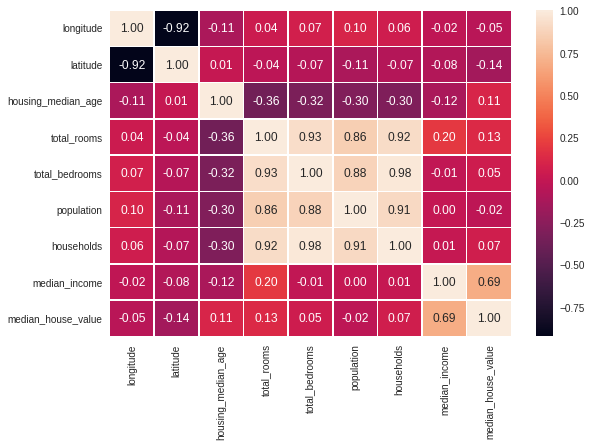

In [32]:
matriz_corr = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", linewidths=.5, ax=ax)

Os intervalos de correlação estão entre -1 e 1. Quando está próximo de 1 significa que há uma correlação positiva e quando está perto de -1 significa que há uma correlação negativa. Quando está próximo de 0, significa que não há correlação linear.

E agora vamos examinar a matriz de correlação novamente adicionando três novas colunas ao conjunto de dados; quartos por domicílio, quartos por cômodo e população por domicílio:

<AxesSubplot:>

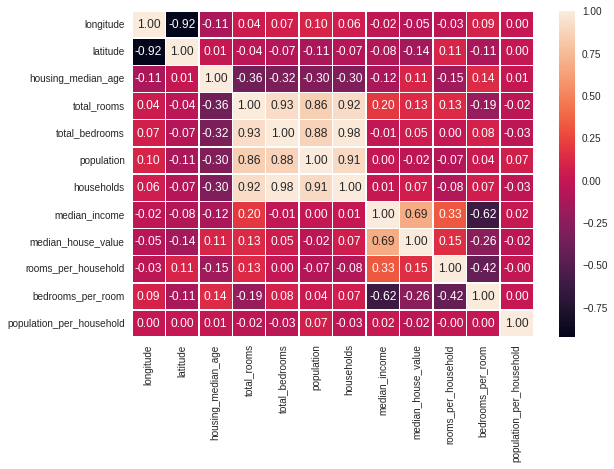

In [33]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]

matriz_corr2 = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matriz_corr2, annot=True, fmt=".2f", linewidths=.5, ax=ax)

### Preparação dos dados

In [34]:
# Removendo as variáveis desnecessárias
df.drop(["rooms_per_household", "bedrooms_per_room", "population_per_household"], axis=1, inplace=True)

In [35]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [36]:
# Verificando se há valores nulos
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

A coluna **total_bedrooms** possui 207 valores nulos, uma técnica para tratar esse problema é substituir os valores nulos pela média ou mediana. Vejamos a distribuição dos dados desta variável.

<AxesSubplot:>

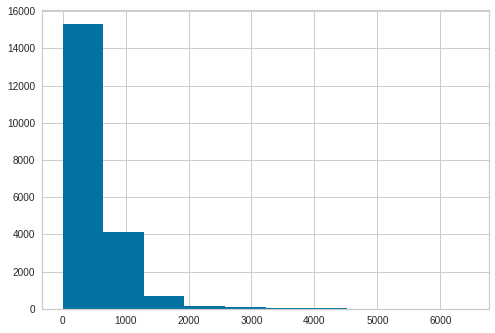

In [37]:
df.total_bedrooms.hist()

In [38]:
# Substituindo os valores faltantes pela média
df = df.fillna(df.total_bedrooms.mean())
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [39]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [41]:
# Dividindo os dados em 80/20 de forma estratificada
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df.ocean_proximity, random_state=42)
train_set.drop(["ocean_proximity"], axis=1, inplace=True)
test_set.drop(["ocean_proximity"], axis=1, inplace=True)

Como é possível notar nesta análise descritiva, não temos outliers nos dados.

### Machine Learning com AutoML

In [21]:
from pycaret.regression import *

In [44]:
setup_model = setup(train_set, target='median_house_value', train_size=.8, normalize=True, feature_selection=True)

,Description,Value
0,session_id,4376
1,Target,median_house_value
2,Original Data,"(16512, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13209, 8)"


In [45]:
models = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,32160.7016,2291530988.7742,47838.1788,0.8260,0.2389,0.1816,0.1590
rf,Random Forest Regressor,32460.0577,2456791301.9609,49537.6272,0.8134,0.2377,0.1797,3.9990
et,Extra Trees Regressor,36045.0706,2870463254.7110,53549.8822,0.7819,0.2531,0.1996,1.7840
gbr,Gradient Boosting Regressor,37992.8191,3001954508.0103,54757.8546,0.7721,0.2708,0.2157,1.7410
knn,K Neighbors Regressor,43756.7820,4072110924.8000,63789.5410,0.6907,0.3022,0.2410,0.0550
dt,Decision Tree Regressor,44645.0816,4831040157.4560,69449.0033,0.6324,0.3246,0.2408,0.0670
par,Passive Aggressive Regressor,49719.7118,5016590840.4738,70791.7243,0.6187,0.4169,0.2781,0.2230
huber,Huber Regressor,49749.6353,4959585299.7053,70387.8556,0.6230,0.4182,0.2825,0.0630
br,Bayesian Ridge,50897.9576,4890864071.3684,69893.2760,0.6282,0.4238,0.3057,0.0190
ridge,Ridge Regression,50898.0434,4890902272.0000,69893.5242,0.6282,0.4224,0.3057,0.0200


De acordo com os resultados MAE e R2, Light Gradient Boosting Machine obteve o melhor desempenho, onde ele explicar 82,60% dos dados, além de obter o menor erro absoluto médio.

In [46]:
model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,32390.4450,2447636135.7861,49473.5903,0.8131,0.2414,0.1811
1,32486.0025,2396080789.6142,48949.7782,0.8282,0.2363,0.1789
2,31872.4366,2290007982.2909,47854.0279,0.8242,0.2407,0.1853
3,31826.3608,2203520502.0288,46941.6713,0.8397,0.2438,0.1875
4,32237.0776,2306422328.7325,48025.2260,0.8184,0.2301,0.1749
5,31593.8961,2153285117.3407,46403.5033,0.8389,0.2312,0.1779
6,33432.9803,2436299729.5850,49358.8870,0.8118,0.2536,0.1950
7,33205.4764,2456007148.2910,49558.1189,0.8163,0.2327,0.1745
8,31843.9504,2327086631.8621,48239.8863,0.8211,0.2471,0.1824
9,30718.3903,1898963522.2110,43577.0986,0.8481,0.2320,0.1783


In [47]:
model_tuned = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,31657.6310,2228802295.5174,47210.1927,0.8298,0.2408,0.1822
1,32774.5165,2431295144.6937,49308.1651,0.8256,0.2451,0.1827
2,31476.2396,2208357325.5940,46993.1625,0.8305,0.2407,0.1827
3,31598.5083,2176970673.7475,46658.0183,0.8416,0.2473,0.1864
4,32378.1950,2311888945.5346,48082.1063,0.8180,0.2353,0.1780
5,31862.7454,2185056976.5232,46744.5930,0.8365,0.2365,0.1812
6,33930.6479,2408727098.5453,49078.7846,0.8140,0.2604,0.1978
7,33322.5490,2414536286.4082,49137.9312,0.8194,0.2463,0.1788
8,32810.2258,2442315488.7479,49419.7884,0.8122,0.2600,0.1872
9,31714.8495,2003831073.3823,44764.1718,0.8397,0.2344,0.1807


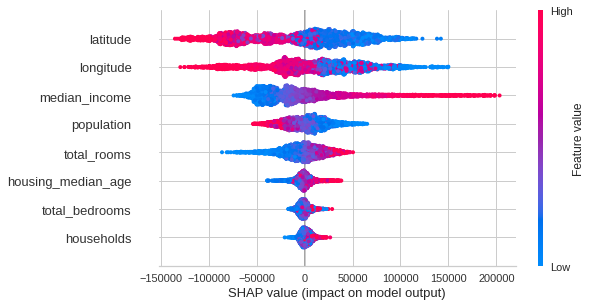

In [49]:
interpret_model(model_tuned)

In [50]:
pred = predict_model(model_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,32959.6207,2346325334.4441,48438.8825,0.8288,0.2485,0.1868


In [51]:
pred

,longitude,median_income,latitude,population,housing_median_age,households,total_bedrooms,total_rooms,median_house_value,Label
0,0.932464,2.507237,-1.004632,-0.707397,-1.884188,-0.709679,-0.683459,-0.437253,397700.0,420705.886245
1,0.667474,-0.812497,-0.812999,0.086135,0.745567,-0.191632,-0.224477,-0.262360,103000.0,106567.667543
2,0.867467,0.265534,-0.859740,-0.696828,0.506498,-0.640250,-0.690783,-0.525865,222100.0,242310.782557
3,0.822467,-0.216361,-0.738215,0.695595,-0.051329,0.401184,0.376105,0.337872,202800.0,162124.336574
4,0.672471,-0.918445,-0.817674,2.399794,-1.007603,1.768399,1.577269,1.112531,133400.0,118068.776188
...,...,...,...,...,...,...,...,...,...,...
3298,0.642473,-1.338941,-0.775608,0.987995,1.064325,0.609470,0.571416,0.100484,100000.0,109002.841362
3299,-1.167465,0.303490,0.776160,-0.858000,1.144015,-0.939328,-0.934922,-0.834609,327600.0,234765.249340
3300,-1.272461,0.070915,0.967794,-0.764644,0.506498,-0.765756,-0.798204,-0.737136,167900.0,187211.132423
3301,-1.257458,-0.777412,0.953773,-0.264393,0.028361,0.115457,0.009896,-0.132706,205600.0,150000.117307


In [54]:
finalize_model(model_tuned)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=71, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=100, n_jobs=-1, num_leaves=200, objective=None,
              random_state=4376, reg_alpha=1e-06, reg_lambda=2, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)